# Analysis of Variance (ANOVA)
It helps us to analyze if there is a difference of the mean in 2 or more groups.
* Null hypothesis: There is no significant difference among the groups.
* $H_0$: $\bar{x}_1$ $=$ $\bar{x}_2$ $=$ $\bar{x}_3$ ... $=$ $\bar{x}_k$
* Alternative hypothesis: There is a significant difference among the groups. At least, one group has an average different from other groups.
* $H_1$: $\bar{x}_i$ $\ne$ $\bar{x}_j$ for some $i, j$
<br>
<br>
Assumptions:
1. The observations are drawn from normally distributed population.
2. The observations represent random samples from the population.
3. The variance of the groups are equal.
<br>
(If these assumptions are not true, then it is advisable to use Kruskall-Wallis H test.)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import norm

In [2]:
# Load the dataset

diabetes = pd.read_csv('diabetesRCT180.csv')
diabetes.head()

,Patient_ID,Age,BMI,Status,Sex,HbA1c_0,HbA1c_6,HbA1c_12,Systolic_0,Systolic_6,Systolic_12,Aspirin_0,Aspirin_6,Aspirin_12,Education
0,131,64,31.66,0,1,8.0,7.4,8.1,140,166,136,0,0,0,1
1,140,31,25.23,1,0,11.0,10.2,12.6,131,120,110,0,1,1,1
2,159,70,27.17,0,0,8.7,9.6,11.0,110,140,140,1,1,1,0
3,173,45,36.21,1,1,15.2,6.4,6.7,130,144,158,1,1,1,2
4,98,46,41.88,1,0,9.0,7.3,6.9,136,136,124,0,1,1,1


In [3]:
# Reassign names to education level

diabetes['Education'] = diabetes['Education'].replace([0, 1, 2, 3, 4], ['Primary', 'Secondary', 'Bachelor', 'Master', 'Doctor'])
diabetes.head()

,Patient_ID,Age,BMI,Status,Sex,HbA1c_0,HbA1c_6,HbA1c_12,Systolic_0,Systolic_6,Systolic_12,Aspirin_0,Aspirin_6,Aspirin_12,Education
0,131,64,31.66,0,1,8.0,7.4,8.1,140,166,136,0,0,0,Secondary
1,140,31,25.23,1,0,11.0,10.2,12.6,131,120,110,0,1,1,Secondary
2,159,70,27.17,0,0,8.7,9.6,11.0,110,140,140,1,1,1,Primary
3,173,45,36.21,1,1,15.2,6.4,6.7,130,144,158,1,1,1,Bachelor
4,98,46,41.88,1,0,9.0,7.3,6.9,136,136,124,0,1,1,Secondary


In [4]:
# Perform summary statistics on the BMI of each education level

educBMI = diabetes[['Education', 'BMI']].groupby('Education').describe()
educBMI

BMI                                                              
          count       mean        std    min      25%     50%      75%    max
Education                                                                    
Bachelor   61.0  36.344590   8.743382  20.92  29.6600  34.280  41.9600  56.32
Doctor     10.0  31.745000   5.884092  24.61  26.6350  30.570  37.5750  39.50
Master     38.0  35.656579  10.183774  21.77  28.6475  33.555  38.9750  69.43
Primary    30.0  31.661667   6.654871  21.14  27.1900  31.030  37.1225  42.12
Secondary  41.0  36.135610   8.445206  23.71  30.6500  35.180  41.1000  63.33

In [5]:
# Create a subset for each group

educBMIpri = diabetes[(diabetes['Education'] == 'Primary')]
educBMIpri = educBMIpri['BMI']

educBMIsec = diabetes[(diabetes['Education'] == 'Secondary')]
educBMIsec = educBMIsec['BMI']

educBMIbac = diabetes[(diabetes['Education'] == 'Bachelor')]
educBMIbac = educBMIbac['BMI']

educBMImas = diabetes[(diabetes['Education'] == 'Master')]
educBMImas = educBMImas['BMI']

educBMIdoc = diabetes[(diabetes['Education'] == 'Doctor')]
educBMIdoc = educBMIdoc['BMI']

## Visualize your data using histogram
* Plot the distribution with a histogram and maximum likelihood gaussian distribution fit

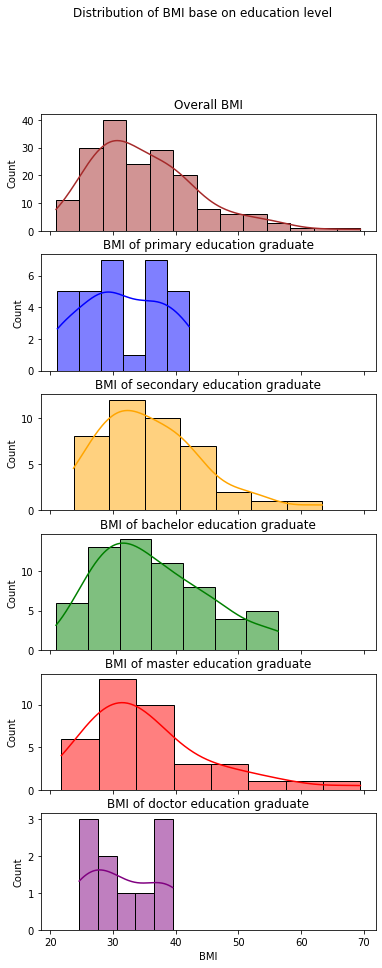

In [44]:
# Create dataset which contains BMI
OverallBMI = diabetes['BMI']

# Create figure and title
fig, axs = plt.subplots(6, 1, figsize=(6, 15), sharex=True)
fig.suptitle('Distribution of BMI base on education level')

# Overall BMI
sns.histplot(OverallBMI, ax=axs[0], color='brown', kde=True)
axs[0].set_title('Overall BMI')

# Primary education graduate
sns.histplot(educBMIpri, ax=axs[1], kde=True, color='blue')
axs[1].set_title('BMI of primary education graduate')

# Secondary education graduate
sns.histplot(educBMIsec, ax=axs[2], kde=True, color='orange')
axs[2].set_title('BMI of secondary education graduate')

# Bachelor education graduate
sns.histplot(educBMIbac, ax=axs[3], kde=True, color='green')
axs[3].set_title('BMI of bachelor education graduate')

# Master education graduate
sns.histplot(educBMImas, ax=axs[4], kde=True, color='red')
axs[4].set_title('BMI of master education graduate')

# Doctor education graduate
sns.histplot(educBMIdoc, ax=axs[5], kde=True, color='purple')
axs[5].set_title('BMI of doctor education graduate')

plt.show()

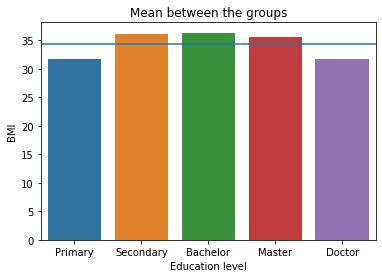

In [49]:
# Create dataset which contains the mean of each group
BetweenGrp = [['Primary', educBMIpri.mean()],
              ['Secondary', educBMIsec.mean()], 
              ['Bachelor', educBMIbac.mean()], 
              ['Master', educBMImas.mean()], 
              ['Doctor', educBMIdoc.mean()]]
BetweenGrp = pd.DataFrame(BetweenGrp, columns = ['Education level', 'BMI'])

# Between group mean
BtwGrp = sns.barplot(data=BetweenGrp, x='Education level', y='BMI')
plt.title('Mean between the groups')

# Create a horizontal line to indicate the mean of all the groups
MeanLine = BetweenGrp['BMI'].mean()
BtwGrp.axhline(MeanLine)

plt.show()

## Visualize your data using boxplot and violinplot

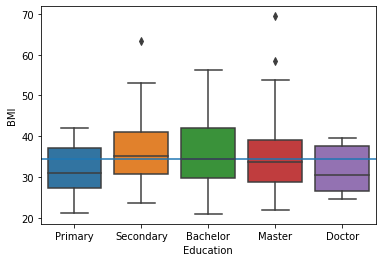

In [50]:
BMIbox = sns.boxplot(data=diabetes, x='Education', y='BMI', order=['Primary', 'Secondary', 'Bachelor', 'Master', 'Doctor'])
BMIbox.axhline(MeanLine)

plt.show()

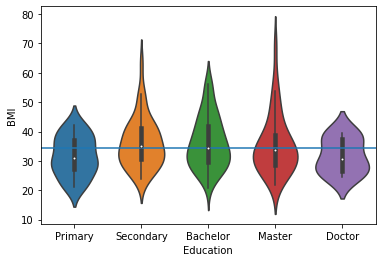

In [52]:
BMIviolin = sns.violinplot(data=diabetes, x='Education', y='BMI', order=['Primary', 'Secondary', 'Bachelor', 'Master', 'Doctor'])
BMIviolin.axhline(MeanLine)

plt.show()

## Perform 1-way ANOVA

In [45]:
# Perform 1-way ANOVA

f_oneway(educBMIpri, educBMIsec, educBMIbac, educBMImas, educBMIdoc)

F_onewayResult(statistic=2.098356387541998, pvalue=0.08300856638914088)

We have a p-value result of 0.08 which is bigger than our threshold 0.05. We can conclude that there is no significant difference of the mean between the groups.

# Note:
Whether your resulting difference is significant or not, you can just end your analysis and made that your last step. However, if your result revealed that there is a significant difference among the groups, then you can proceed with post-hoc analysis using **Tukey's honestly signiicantly differenced (HSD)** test. It will perform multiple pairwise comparison to the groups.
<br>
In python, your Tukey HSD test can start with this code

```
statsmodels.stats.multicomp import pairwise_tukeyhsd
```

